<a href="https://colab.research.google.com/github/ghism137/awesome-python/blob/master/PAI_W11_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning - Clustering (Practice)**

---



Lecturer: **Nguyen Van Thieu**

- Phân cụm (còn được gọi là Phân tích cụm) có thể được định nghĩa là một kỹ thuật Học máy không giám sát nhóm một tập hợp các điểm dữ liệu theo cách thức mà các điểm dữ liệu trong cùng một nhóm (cụm) giống nhau hơn so với những điểm thuộc các nhóm (cụm) khác.

- Mục tiêu chính của việc sử dụng các thuật toán Phân cụm là phân loại dữ liệu có hành vi tương tự và gán chúng vào "Cụm". Giả sử, bạn đang kinh doanh trực tuyến và muốn phân loại khách hàng của mình thành 5 cụm dựa trên một số hành vi của họ. Thông tin này sẽ giúp bạn hiểu các loại khách hàng khác nhau và sau đó bạn có thể đưa ra các chiến lược kinh doanh tập trung vào khách hàng hơn. Cách bạn chọn nhóm chúng sẽ giúp bạn hiểu rõ hơn về từng khách hàng cá nhân.

---



# 1.**Một số phương pháp phổ biến**

1. Centroid-based Clustering:

    + Trong phương pháp này, các cluster được định nghĩa bởi một điểm trung tâm (centroid). Mục tiêu là tìm các centroid sao cho khoảng cách từ các điểm dữ liệu tới centroid gần nhất của chúng là nhỏ nhất.
    + K-Means Clustering là một ví dụ điển hình của phương pháp này.

2. Connectivity-based/Hierarchical Clustering:

    + Đây là phương pháp xây dựng hierarchy (cây phân cấp) của các cluster dựa trên khoảng cách giữa các điểm dữ liệu.
    + Các cluster được tạo theo cấp bậc, từ dưới lên trên.

3. Density-based Clustering:

    + Phương pháp này tập trung vào việc tìm các vùng có mật độ điểm dữ liệu cao trong không gian.
    + Các cluster được định nghĩa là các vùng liên kết với mật độ cao.

4. Distribution-based Clustering:

    + Phương pháp này giả định rằng dữ liệu được sinh ra từ các phân phối xác suất (ví dụ Gaussian) khác nhau.
    + Mục tiêu là tìm ra các tham số của các phân phối này và gán mỗi điểm dữ liệu vào nhóm tương ứng.

# 2.Data

Tập dữ liệu OnlineBusinessCustomers có thể truy cập tại đây:
https://github.com/thieu1995/csv-files/tree/main/data/ai-programming-course


# 3.Partitional Clustering (Kmeans)


Phân nhóm K-Means là một kỹ thuật Học Máy Không Giám Giám Sát có thể được sử dụng để tìm các nhóm trong dữ liệu chưa gắn nhãn (nghĩa là, dữ liệu không có các loại/lớp đã được xác định) dựa trên tính tương tự của các đặc trưng. Số lượng nhóm được biểu diễn bởi biến "K". Thuật toán hoạt động lặp đi lặp lại để gán mỗi điểm dữ liệu vào một trong K nhóm dựa trên các đặc trưng được cung cấp.

---

**Các Bước Phân Nhóm K-Means**

Phân nhóm K-Means sử dụng Tinh chỉnh Lặp để tạo ra kết quả cuối cùng. Đầu vào của thuật toán là số lượng nhóm (K) và một tập dữ liệu chưa gắn nhãn (tập hợp các đặc trưng cho tất cả các điểm dữ liệu).

+ Bước 1: Chọn số lượng nhóm, tức là giá trị của "K"
+ Bước 2: Chọn ngẫu nhiên K tâm nhóm, có thể được tạo ngẫu nhiên hoặc chọn ngẫu nhiên từ tập dữ liệu.
+ Bước 3: Gán mỗi điểm dữ liệu từ tập dữ liệu đến tâm nhóm gần nhất của nó. Điều này dẫn đến việc hình thành K số lượng nhóm.
+ Bước 4: Tính toán và đặt tâm nhóm mới cho mỗi nhóm.
+ Bước 5: Gán lại mỗi điểm dữ liệu từ tập dữ liệu đến tâm nhóm mới được hình thành gần nhất với nó. Nếu có bất kỳ sự gán nào xảy ra ở bước này, hãy chuyển đến Bước 4 và lặp lại quá trình cho đến khi không còn sự gán nào xảy ra.
+ Bước 6: Mô hình đã sẵn sàng

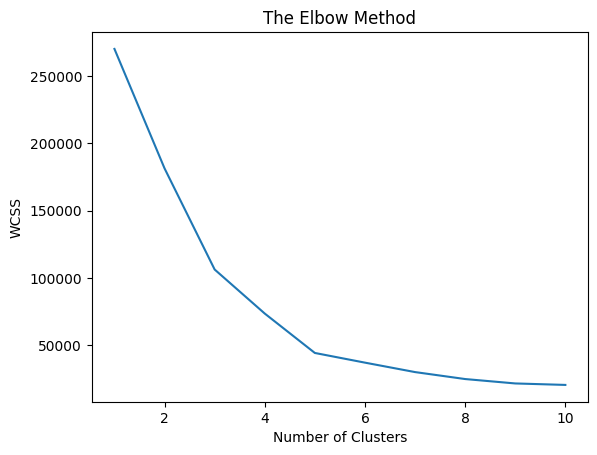

In [ ]:
# Import the required libraries and the collected dataset
import pandas as pd
import matplotlib.pyplot as plotter
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/ai-programming-course/OnlineBusinessCustomers.csv')
X = df.iloc[:, [3, 4]].values

# Use the Elbow Method to find out the optimal number of clusters
from sklearn.cluster import KMeans

wcss = [] # Within Cluster Sum of Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plotter.plot(range(1,11),wcss)
plotter.title('The Elbow Method')
plotter.xlabel('Number of Clusters')
plotter.ylabel('WCSS')
plotter.show()


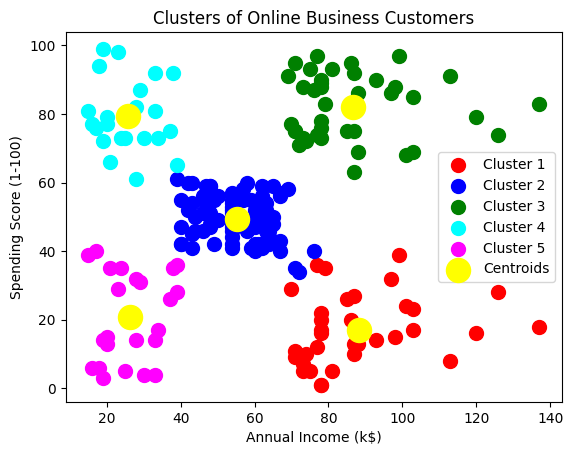

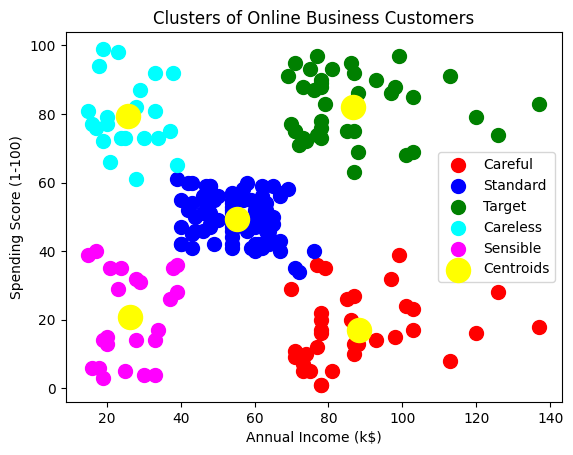

In [ ]:
# Apply the k-means clustering model to the collected dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualize the Clusters (for 2-D Clustering)
plotter.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plotter.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plotter.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plotter.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plotter.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plotter.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plotter.title('Clusters of Online Business Customers')
plotter.xlabel('Annual Income (k$)')
plotter.ylabel('Spending Score (1-100)')
plotter.legend()
plotter.show()

# Visualize the Clusters with category names given (for 2-D Clustering)
plotter.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Careful')
plotter.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Standard')
plotter.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Target')
plotter.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='cyan',label='Careless')
plotter.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],s=100,c='magenta',label='Sensible')
plotter.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plotter.title('Clusters of Online Business Customers')
plotter.xlabel('Annual Income (k$)')
plotter.ylabel('Spending Score (1-100)')
plotter.legend()
plotter.show()

# 4.Hierarchical Clustering

Phân cụm Hierarchical hay Phân tích cụm Hierarchical là một thuật toán Phân cụm Học máy không giám sát, tạo ra các cụm dữ liệu tương tự bằng cách xem mỗi điểm dữ liệu ban đầu là một cụm riêng biệt. Do đó, ở bước khởi tạo, nó sẽ tạo ra "N" cụm cho "N" điểm dữ liệu. Kỹ thuật Phân cụm Hierarchical cơ bản được chia thành 2 loại:

+ Kỹ thuật Tích hợp (Xây dựng lên)
+ Kỹ thuật Chia tách (Xây dựng xuống)



## 4.1 Kỹ thuật Tích hợp (Xây dựng lên):

Ở đây, mỗi điểm dữ liệu được coi là một cụm riêng biệt. Ở mỗi lần lặp của kỹ thuật này, các cụm tương tự sẽ hợp lại với các cụm khác cho đến khi chỉ còn lại một cụm hoặc "K" cụm.

**Các bước thực hiện Phân cụm Hierarchical Tích hợp:**

+ Bước 1: Xem mỗi điểm dữ liệu là một cụm đơn lẻ. Vì vậy, "N" điểm dữ liệu tương ứng với "N" cụm.
+ Bước 2: Lấy 2 điểm/cụm gần nhau và hợp chúng thành một cụm. Bây giờ có "N-1" cụm.
+ Bước 3: Lấy 2 cụm gần nhau và hợp chúng thành một cụm duy nhất. Kết quả là "N-2" cụm.
+ Bước 4: Lặp lại Bước 3 cho đến khi chỉ còn lại một cụm.
+ Bước 5: Mô hình đã sẵn sàng.


Khoảng cách giữa các điểm dữ liệu có thể tính dựa trên Khoảng cách Euclidean (được thảo luận trong phần PHÂN LOẠI của hướng dẫn này).

**Khoảng cách giữa các cụm có thể được tính bằng một trong các cách sau:**

+ Tìm khoảng cách giữa các điểm gần nhau
+ Tìm khoảng cách giữa các điểm xa nhất
+ Tìm khoảng cách trung bình
+ Tìm khoảng cách giữa các tâm cụm



### a. Dendrogram

Dendrogram là các sơ đồ dạng cây, mô tả mối quan hệ phân cấp giữa các điểm dữ liệu, ghi lại các chuỗi hợp và chia cụm trong thuật toán Phân cụm Hierarchical. Đây là một biểu diễn hình ảnh của Dendrogram:



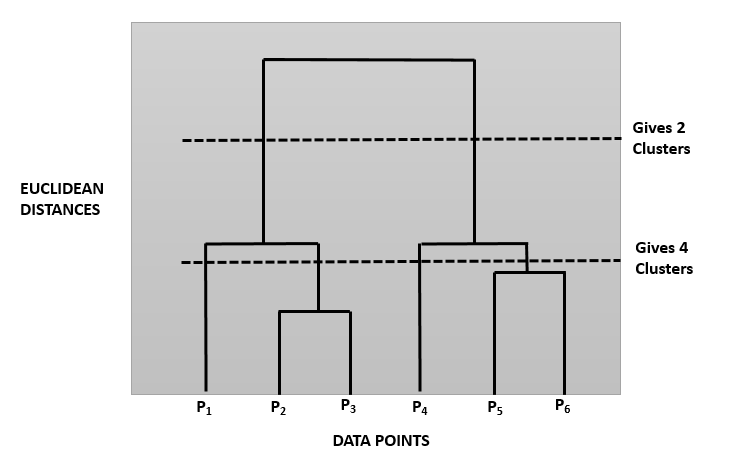

Chiều cao của thanh trong Dendrogram này biểu thị Khoảng cách Euclidean giữa 2 điểm dữ liệu đang hình thành cụm. Việc tạo Dendrogram Phân cụm Hierarchical thường bao gồm hai bước quan trọng:

+ Thiết lập Ngưỡng Khoảng cách Euclidean (còn được gọi là Ngưỡng Khác biệt)

+ Số Cụm = Số đường thẳng vuông góc cắt qua đường Ngưỡng Khoảng cách Euclidean. Trong biểu đồ này, đối với đường nét đứt trên cùng, số lượng là 2 và đối với đường nét đứt bên dưới, số lượng là 4.

## 4.2 Kỹ thuật Phân chia (Xây dựng từ trên xuống):

**Cách thực hiện, thuật toán**

+ Tại đầu tiên, tất cả các điểm dữ liệu được xem là nằm trong một cụm duy nhất.
+ Ở mỗi lần lặp, các điểm dữ liệu không tương tự sẽ được tách ra khỏi cụm.
+ Mỗi điểm dữ liệu được tách ra được xem là một cụm riêng biệt.
+ Sau quá trình lặp, sẽ còn lại N cụm.
+ Kỹ thuật này ít được sử dụng trong thực tế.





Mặc dù kỹ thuật Kết hợp (Agglomerative) khá phổ biến khi giải quyết các bài toán Phân cụm Hierarchical, nhưng bản thân cũng có một số nhược điểm liên quan đến Độ phức tạp Không gian và Thời gian. Không gian cần thiết cho thuật toán này rất lớn khi số lượng điểm dữ liệu rất cao, vì chúng ta cần lưu trữ ma trận tương tự trong bộ nhớ RAM. Độ phức tạp về không gian có bậc bằng bình phương của n. Độ phức tạp về không gian được cho bởi công thức:

**Độ phức tạp không gian = O(n²)**

Trong đó, "n" là số lượng điểm dữ liệu.




Độ phức tạp thời gian của thuật toán này cũng trở nên rất cao bởi vì n lần lặp sẽ được thực hiện và ở mỗi lần lặp, ma trận tương tự cần phải được cập nhật và khôi phục. Độ phức tạp thời gian được cho bởi công thức:

**Độ phức tạp thời gian = O(n³)**


Do đó, thuật toán phân cụm này không được ưa chuộng để tạo mô hình cho tập dữ liệu lớn.



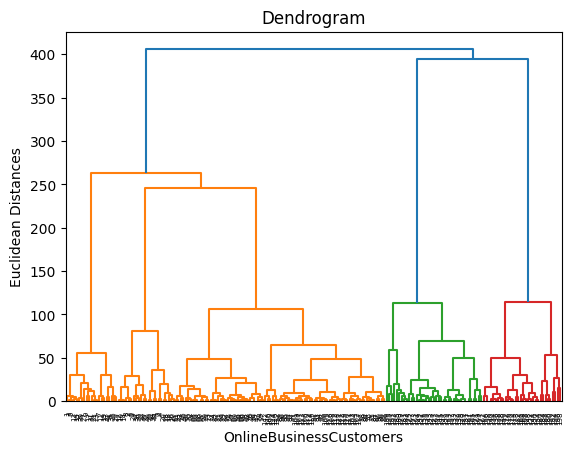

In [ ]:
# Import the required libraries and the collected dataset
import pandas as pd
import matplotlib.pyplot as plotter
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/ai-programming-course/OnlineBusinessCustomers.csv')
X = df.iloc[:, [3, 4]].values

# Use Dendrogram to find out the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))

plotter.title('Dendrogram')
plotter.xlabel('OnlineBusinessCustomers')
plotter.ylabel('Euclidean Distances')
plotter.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


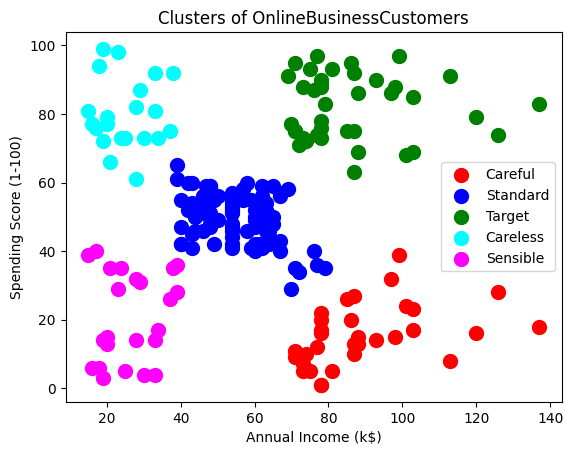

In [ ]:
# Fit the Hierarchical Clustering Model to the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y_hc = hc.fit_predict(X)

# Visualize the clusters
plotter.scatter(X[Y_hc==0,0],X[Y_hc==0,1],s=100,c='red',label='Careful')
plotter.scatter(X[Y_hc==1,0],X[Y_hc==1,1],s=100,c='blue',label='Standard')
plotter.scatter(X[Y_hc==2,0],X[Y_hc==2,1],s=100,c='green',label='Target')
plotter.scatter(X[Y_hc==3,0],X[Y_hc==3,1],s=100,c='cyan',label='Careless')
plotter.scatter(X[Y_hc==4,0],X[Y_hc==4,1],s=100,c='magenta',label='Sensible')
plotter.title('Clusters of OnlineBusinessCustomers')
plotter.xlabel('Annual Income (k$)')
plotter.ylabel('Spending Score (1-100)')
plotter.legend()
plotter.show()

# 5.Density Clustering (DBSCAN)


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html




In [ ]:
# Import the required libraries and the collected dataset
import pandas as pd
import matplotlib.pyplot as plotter

df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/ai-programming-course/OnlineBusinessCustomers.csv')
X = df.iloc[:, [3, 4]].values

print(X[2,:])

[16  6]


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

print(X_normalized[2,:])

[-0.7039784  -0.71022139]


In [ ]:
# Building the clustering model
db_default = DBSCAN(eps = 0.15, min_samples = 3).fit(X_normalized)
labels = db_default.labels_

unique_labels, count_labels = np.unique(labels, return_counts = True)
print(unique_labels, count_labels)


[-1  0  1  2  3] [ 2 94 56 42  6]


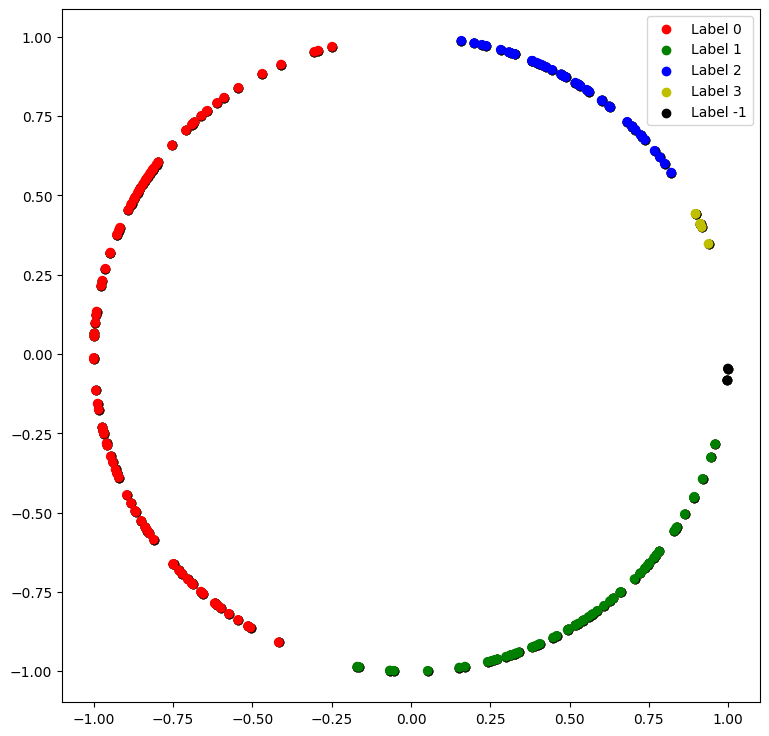

In [ ]:
df = pd.DataFrame(X_normalized)
df.columns = ['P1', 'P2']

# Visualizing the clustering

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

plotter.figure(figsize =(9, 9))

# For the construction of the legend of the plot
r = plotter.scatter(df['P1'], df['P2'], color ='r')
g = plotter.scatter(df['P1'], df['P2'], color ='g')
b = plotter.scatter(df['P1'], df['P2'], color ='b')
y = plotter.scatter(df['P1'], df['P2'], color ='y')
k = plotter.scatter(df['P1'], df['P2'], color ='k')

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined

plotter.scatter(df['P1'], df['P2'], c = cvec)

# Building the legend
plotter.legend((r, g, b, y, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label -1'))

plotter.show()

## 5.1 Tuning the parameters of the model

1) Tìm hiểu các tham số của mô hình, cảm nhận xét tham số nào là quan trọng và có ảnh hưởng lớn đến kết quả của bài toán.

2) Sau đó lựa chọn các giá trị có thể tốt cho mô hình

3) Dùng các vòng lặp for tìm bộ tham số tốt nhất. Vì đây là thuật toán phân cụm nên sẽ không thể sử dụng được `GridSearchCV`.

4) Tìm xem bộ tham số nào tốt nhất dựa vào độ đo `sihouette`. Có thể dùng các độ đo khác, xem tại: https://permetrics.readthedocs.io/en/latest/pages/clustering.html


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

best_score = -1
best_params = {'eps': None, 'min_samples': None}

eps_list = [0.05, 0.075, 0.1, 0.125, 0.15]
samp_list = [5, 10, 15, 20, 25]

for idx, eps in enumerate(eps_list):
    for jdx, sam in enumerate(samp_list):
        db = DBSCAN(eps = eps, min_samples = sam).fit(X_normalized)

        unique_labels, count_labels = np.unique(db.labels_, return_counts = True)
        print(f"eps: {eps}, sam: {sam}, unique_labels: {unique_labels}, count_labels: {count_labels}")

        if len(unique_labels) > 1:
            score = silhouette_score(X_normalized, db.labels_)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = sam

print(f"\nBest Silhouette Score: {best_score}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

eps: 0.05, sam: 5, unique_labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12], count_labels: [54 12 19 15  7  7  5 15 17  6  8 22  8  5]
eps: 0.05, sam: 10, unique_labels: [-1  0], count_labels: [183  17]
eps: 0.05, sam: 15, unique_labels: [-1], count_labels: [200]
eps: 0.05, sam: 20, unique_labels: [-1], count_labels: [200]
eps: 0.05, sam: 25, unique_labels: [-1], count_labels: [200]
eps: 0.075, sam: 5, unique_labels: [-1  0  1  2  3  4  5  6  7  8], count_labels: [17 24 29 18 10  7 41 42  6  6]
eps: 0.075, sam: 10, unique_labels: [-1  0  1  2  3  4], count_labels: [115  20  14  15  15  21]
eps: 0.075, sam: 15, unique_labels: [-1  0], count_labels: [182  18]
eps: 0.075, sam: 20, unique_labels: [-1], count_labels: [200]
eps: 0.075, sam: 25, unique_labels: [-1], count_labels: [200]
eps: 0.1, sam: 5, unique_labels: [-1  0  1  2  3  4], count_labels: [16 42 46 48 42  6]
eps: 0.1, sam: 10, unique_labels: [-1  0  1  2  3  4  5  6], count_labels: [60 26 16 14 35 29 10 10]
eps: 0.1, sam: 15, 

# 6.Bài tập

Chọn lấy 1 bộ dữ liệu bất kì từ đây. https://github.com/milaan9/Clustering-Datasets

Chọn lấy ít nhất 2 thuật toán clustering tại thư viện Scikit-Learn: https://scikit-learn.org/stable/api/sklearn.cluster.html

So sánh kết quả vẽ hình, đánh giá dựa trên các performance metrics, ví dụ một số metrics tại đây:
https://permetrics.readthedocs.io/en/latest/pages/clustering.html

https://github.com/thieu1995/PerMetrics


